In [116]:
# Query USGS server and get basic info for USGS site
def get_info_USGSsite(sitecode):
    from pygeohydro import NWIS
 
    query = {
        "site": "%s"%(sitecode)
    }
    info = NWIS().get_info(query)
    return info

# Query USGS server and get upstream contributing area for USGS site
def get_UpstreamBasin_USGSsite(sitecode):
    from pynhd import NLDI
    
    basin = NLDI().get_basins([sitecode])
    basin = basin.to_crs('EPSG:4326')
    return basin



In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt

# CossatotRiver.shp  Flatbrook.shp  LittleTennessee.shp  MayoRiver.shp  NeversinkHeadwaters.shp  PantherCreek.shp  TaylorUpstream.shp
# Read shapefiles
CossatotRiver = gpd.read_file('CossatotRiver.shp')
Flatbrook = gpd.read_file('Flatbrook.shp')
LittleTennessee = gpd.read_file('LittleTennessee.shp')
MayoRiver = gpd.read_file('MayoRiver.shp')
NeversinkHeadwaters = gpd.read_file('NeversinkHeadwaters.shp')
PantherCreek = gpd.read_file('PantherCreek.shp')
TaylorUpstream = gpd.read_file('TaylorUpstream.shp')

# Bring the shapefiles into common cordinate system
CossatotRiver = CossatotRiver.to_crs('EPSG:4326')
Flatbrook = Flatbrook.to_crs('EPSG:4326')
LittleTennessee = LittleTennessee.to_crs('EPSG:4326')
MayoRiver = MayoRiver.to_crs('EPSG:4326')
NeversinkHeadwaters = NeversinkHeadwaters.to_crs('EPSG:4326')
PantherCreek = PantherCreek.to_crs('EPSG:4326')
TaylorUpstream = TaylorUpstream.to_crs('EPSG:4326')

#CossatotRiver
#Flatbrook
#LittleTennessee
#MayoRiver
#NeversinkHeadwaters 
#PantherCreek
#TaylorUpstream

#Site area 	State (s) 	Area sq km 	USGS site code
#Little Tennessee 	NC,VA 	362.6 	  "03500000"
#Flatbrook 	NJ 	165.76 	  "1440000"
#Taylor upstream 	CO 	331.52 	  "09107000"
#Panther creek 	AL 	227.14     	  "02369800"
#Mayo river 	VA 	218.34 	  "02069700"
#Neversink River 	NY 	160.6 	  "01435000"
#Cossatot River 	AR 	230.63       	  "07340300"

# Get info about each of the USGS sites
CossatotRiver_info = get_info_USGSsite("07340300")
Flatbrook_info = get_info_USGSsite("01440000")
LittleTennessee_info = get_info_USGSsite("03500000")
MayoRiver_info = get_info_USGSsite("02069700")
NeversinkHeadwaters_info = get_info_USGSsite("01435000") 
PantherCreek_info = get_info_USGSsite("02369800")
TaylorUpstream_info = get_info_USGSsite("09107000")

# Add station_nm and site no/code to all watersheds -- because not all of the shapefiles have them already
CossatotRiver['station_nm'] = CossatotRiver_info['station_nm']
CossatotRiver['usgs_code'] = CossatotRiver_info['site_no']

Flatbrook['station_nm'] = Flatbrook_info['station_nm']
Flatbrook['usgs_code'] = Flatbrook_info['site_no']

LittleTennessee['station_nm'] = LittleTennessee_info['station_nm']
LittleTennessee['usgs_code'] = LittleTennessee_info['site_no']

MayoRiver['station_nm'] = MayoRiver_info['station_nm']
MayoRiver['usgs_code'] = MayoRiver_info['site_no']

NeversinkHeadwaters['station_nm'] = NeversinkHeadwaters_info['station_nm']
NeversinkHeadwaters['usgs_code'] = NeversinkHeadwaters_info['site_no']

PantherCreek['station_nm'] = PantherCreek_info['station_nm']
PantherCreek['usgs_code'] = PantherCreek_info['site_no']

TaylorUpstream['station_nm'] = TaylorUpstream_info['station_nm']
TaylorUpstream['usgs_code'] = TaylorUpstream_info['site_no']


# Merge/Combine multiple shapefiles into one
ats_watersheds = gpd.pd.concat([CossatotRiver, Flatbrook, LittleTennessee, MayoRiver, NeversinkHeadwaters, PantherCreek, TaylorUpstream])
 
#Export merged geodataframe into shapefile
ats_watersheds.to_file("ats_watersheds.shp")

In [3]:
print(ats_watersheds.station_nm)
#CossatotRiver_info = get_info_USGSsite("07340300")
#CossatotRiver['station_nm'] = CossatotRiver_info['site_no']
#CossatotRiver['site_no'] = CossatotRiver_info.site_no

#CossatotRiver

0         Cossatot River Near Vandervoort, AR
0          Flat Brook Near Flatbrookville, NJ
0    Little Tennessee River Near Prentiss, NC
0       South Mayo River Near Nettleridge, VA
0         Neversink River Near Claryville, NY
0           Blackwater River Near Bradley, AL
0             Taylor River At Taylor Park, CO
Name: station_nm, dtype: object


In [4]:
#Flatbrook.columns
LittleTennessee
CossatotRiver

,OBJECTID,tnmid,metasource,sourcedata,sourceorig,sourcefeat,loaddate,noncontrib,noncontr_1,areasqkm,...,states,huc12,hutype,humod,tohuc,Shape_Leng,Shape_Area,geometry,station_nm,usgs_code
0,27316.0,{E280A738-4AAA-4F24-840D-D342DE6B816E},{86C7BAFF-1268-48BE-A1E8-834E5348D387},1,None,None,2017/12/14 10:58:12.000,0.0,0.0,90.15,...,AR,111401090401,S,NM,111401090403,0.566643,0.008843,"POLYGON ((-94.02331 34.39206, -94.02351 34.392...","Cossatot River Near Vandervoort, AR",07340300


In [5]:
ats_watersheds.columns

Index(['OBJECTID', 'tnmid', 'metasource', 'sourcedata', 'sourceorig',
       'sourcefeat', 'loaddate', 'noncontrib', 'noncontr_1', 'areasqkm',
       'areaacres', 'referenceg', 'name', 'states', 'huc12', 'hutype', 'humod',
       'tohuc', 'Shape_Leng', 'Shape_Area', 'geometry', 'station_nm',
       'usgs_code', 'hru_id', 'ann_P', 'lon_cen', 'lat_cen', 'AREA',
       'elev_mean', 'ave_T', 'july_T', 'Perimeter', 'Name'],
      dtype='object')

In [6]:
ats_watersheds

,OBJECTID,tnmid,metasource,sourcedata,sourceorig,sourcefeat,loaddate,noncontrib,noncontr_1,areasqkm,...,hru_id,ann_P,lon_cen,lat_cen,AREA,elev_mean,ave_T,july_T,Perimeter,Name
0,27316.0,{E280A738-4AAA-4F24-840D-D342DE6B816E},{86C7BAFF-1268-48BE-A1E8-834E5348D387},1,None,None,2017/12/14 10:58:12.000,0.0,0.0,90.15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1440000.0,0.0,-74.79817,41.21119,1.715668e+08,263.303571,None,None,131868.0,NaN
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3500000.0,0.0,-83.38489,35.02575,3.624706e+08,848.230769,None,None,131245.0,NaN
0,40954.0,{E3420DE1-CC95-4EE1-81D3-7B96402BB64A},{0080214A-E0C8-4A84-9585-41B6830A1C1E},1,None,None,2019/05/14 08:10:26.000,0.0,0.0,151.38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NY20211109191829844000
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2369800.0,0.0,-86.66848,31.08605,2.311403e+08,79.541850,None,None,111487.0,NaN
0,27054.0,{21773160-4973-4E00-92C3-DD479AFAE742},{6A40B4E3-27CB-4306-A791-9EE00248731D},None,None,None,2017/10/25 09:19:09.000,0.0,0.0,161.34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

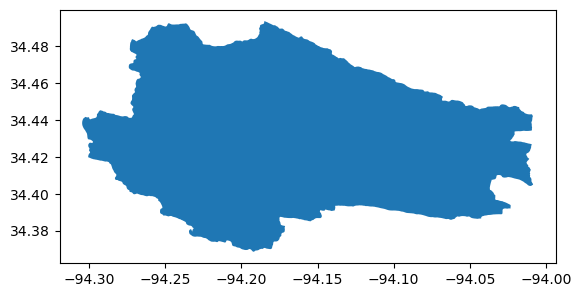

In [7]:
CossatotRiver.plot()

In [159]:
def plot_basins(basins, basins_info, neighbor_huc12):
    import matplotlib.pyplot as plt
    import contextily as cx
    from shapely.geometry import Point
    import geopandas as gpd
    
    fig, ax = plt.subplots(1,2, figsize=(20,10))
    
    # Add a CONUS plot with the subbasins
    us_states=get_US_States(48)
    us_states.boundary.plot(edgecolor='black', linewidth=1, ax=ax[0], color=None)
    neighbor_huc12.boundary.plot(edgecolor='yellow', linewidth=1, ax=ax[0], color=None)
    basins.plot(ax=ax[0], color='red')
    cx.add_basemap(ax[0], crs=basins.crs)
    
    # Add a zoomed in plot for basins
    site_loc = [Point(xy) for xy in zip(basins_info.dec_long_va, basins_info.dec_lat_va)]
    site_loc_df = gpd.GeoDataFrame(geometry = site_loc)
    
    neighbor_huc12.boundary.plot(edgecolor='grey', linewidth=1, ax=ax[1], color=None)
    basins.plot(ax=ax[1], color='blue')
    site_loc_df.plot(ax=ax[1], markersize=20, color='red', marker='o', label=basins_info.site_no)
    cx.add_basemap(ax[1], crs=basins.crs)
    ax[1].set_title(basins_info.station_nm[0])
    plt.tight_layout()
    plt.savefig('map_basins_%s.png'%(id), bbox_inches='tight', dpi=300)
    plt.show()
    
def get_US_States(nstates=48):
    import geopandas as gpd
    
    if (nstates not in [48, 50]):
        print("Number of US states must be 48 or 50")
        exit(1)
    
    #read US States():
    us_states = gpd.read_file('https://github.com/jitendra-kumar/hydrology_codes/raw/main/data/USA_states_epsg4326.geojson')
    # extract CONUS only -- lower 48
    conus_states = us_states[~us_states.NAME_1.isin(['Alaska', 'Hawaii'])]
    if nstates==50:
        return us_states
    if nstates==48:
        return conus_states

def get_basins(id):
    from pynhd import NLDI, NHDPlusHR
    from pygeohydro import NWIS
       
    basins_info=get_info_USGSsite(id)
    basins=get_UpstreamBasin_USGSsite(id)
    basins.to_file('basin_%s.json'%(id), driver="GeoJSON")
    
    # Get all HUC12s in the extent/neihborhood of the USGS gauge site for context
    r = NHDPlusHR("huc12")
    neighbor_huc12 = hr.bygeom(basins.geometry[0].bounds)
    
    return basins,basins_info,neighbor_huc12



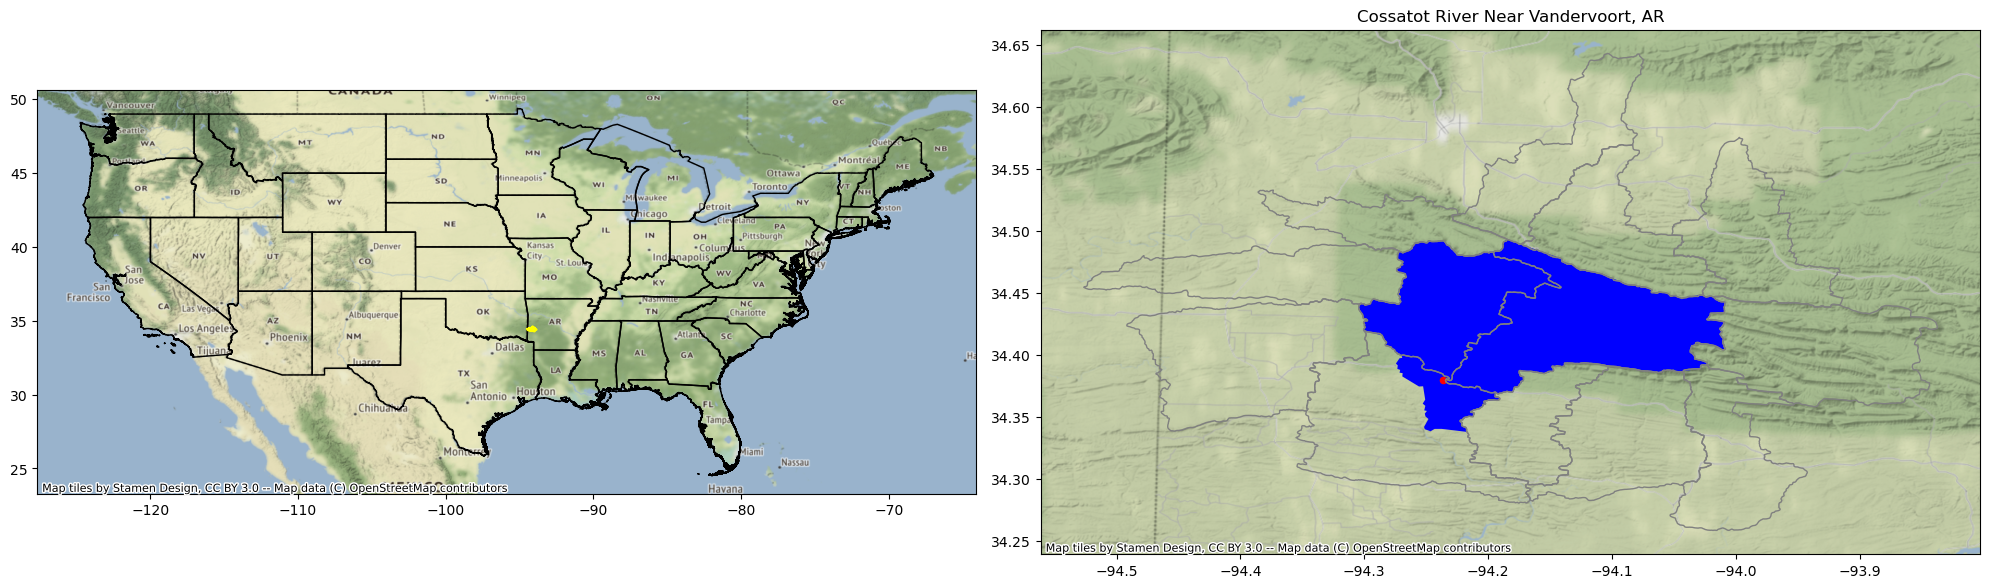

In [160]:
def main():
    id="07340300"
    basins,basins_info,neighbor_huc12 = get_basins(id)
    plot_basins(basins,basins_info,neighbor_huc12)

if __name__ == '__main__':
    main()

In [152]:
from shapely.geometry import Point
id="07340300"
basins,basins_info,neighbor_huc12 = get_basins(id)

SSLError: HTTPSConnectionPool(host='labs.waterdata.usgs.gov', port=443): Max retries exceeded with url: /geoserver/wmadata/ows?service=WFS&request=GetCapabilities&version=2.0.0 (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:997)')))

In [165]:
print("Site no %s"%(basins_info.site_no[0]))#.dec_long_va
#site_loc = [Point(xy) for xy in zip(basins_info.dec_long_va, basins_info.dec_lat_va)]
#site_loc_df = gpd.GeoDataFrame(geometry = site_loc)
#site_loc_df.plot(markersize=20, color='red', marker='o', label=basins_info.site_no)

Site no 07340300


In [ ]:
### over lay two sets of basins and calculate overlap

In [11]:
#merged = gpd.overlay(CossatotRiver, basins, how='intersection')
merged = gpd.overlay(CossatotRiver, basins, how='difference')

In [7]:
ls

ats_csv_to_netcdf.ipynb  cache/                    merge_shapefiles.ipynb
basin_07340300.json      download_from_usgs.ipynb


In [26]:
merged

,OBJECTID,tnmid,metasource,sourcedata,sourceorig,sourcefeat,loaddate,noncontrib,noncontr_1,areasqkm,...,referenceg,name,states,huc12,hutype,humod,tohuc,Shape_Leng,Shape_Area,geometry
0,27316.0,{E280A738-4AAA-4F24-840D-D342DE6B816E},{86C7BAFF-1268-48BE-A1E8-834E5348D387},1,None,None,2017/12/14 10:58:12.000,0.0,0.0,90.15,...,None,Brushy Creek,AR,111401090401,S,NM,111401090403,0.566643,0.008843,"POLYGON ((-94.02346 34.39203, -94.02356 34.392..."


In [27]:
CossatotRiver

,OBJECTID,tnmid,metasource,sourcedata,sourceorig,sourcefeat,loaddate,noncontrib,noncontr_1,areasqkm,...,referenceg,name,states,huc12,hutype,humod,tohuc,Shape_Leng,Shape_Area,geometry
0,27316.0,{E280A738-4AAA-4F24-840D-D342DE6B816E},{86C7BAFF-1268-48BE-A1E8-834E5348D387},1,None,None,2017/12/14 10:58:12.000,0.0,0.0,90.15,...,None,Brushy Creek,AR,111401090401,S,NM,111401090403,0.566643,0.008843,"POLYGON ((-94.02331 34.39206, -94.02351 34.392..."


In [28]:
basins

,geometry
identifier,
07340300,"POLYGON ((-94.25121 34.34012, -94.25177 34.341..."


In [29]:
merged.geometry.area

/tmp/ipykernel_679139/2793086408.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  merged.geometry.area


0    0.022537
dtype: float64

In [30]:
CossatotRiver.geometry.area

/tmp/ipykernel_679139/2861255281.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  CossatotRiver.geometry.area


0    0.022618
dtype: float64

In [31]:
basins.geometry.area

/tmp/ipykernel_679139/4240722150.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  basins.geometry.area


identifier
07340300    0.024761
dtype: float64

In [ ]:
fig, ax = plt.subplots(figsize=(15, 15))
CossatotRiver.plot(color='red', ax=ax, alpha=0.25)
basins.plot(color='blue', ax=ax, alpha=0.25)

In [44]:
info

,agency_cd,site_no,station_nm,site_tp_cd,dec_lat_va,dec_long_va,coord_acy_cd,dec_coord_datum_cd,alt_va,alt_acy_va,alt_datum_cd,huc_cd,drain_sqkm,hcdn_2009,geometry
0,USGS,07340300,"Cossatot River Near Vandervoort, AR",ST,34.38,-94.236389,T,NAD83,771.74,0.2,NAVD88,11140109,230.4347,True,POINT (-94.23639 34.38000)
